# **Proyecto 1 c3**

Aprendizaje no supervisado


*   Daniel Bernal Ternera

**Intencion:**

El siguiente proyecto tiene la intención de evaluar la capacidad de los algoritmos de agrupamiento, específicamente el método K-means, para identificar patrones y agrupar datos en diferentes escenarios. Mediante el planteamiento de pasos y preguntas clave, se busca analizar el comportamiento del algoritmo en contextos con distribuciones de datos variadas y su aplicabilidad en problemas más complejos, como la clasificación de rostros basada en características únicas.

**Enfoque:**

En la primera parte, se trabaja con diferentes distribuciones de datos, desde patrones simples hasta estructuras más complejas y desordenadas. Esto permite explorar cómo herramientas como los gráficos de codo y silueta ayudan a determinar el número óptimo de grupos y evaluar la efectividad del agrupamiento. Estas decisiones se basan tanto en análisis visuales como en métricas específicas, considerando la uniformidad de los grupos y su adecuación al conjunto de datos.

La segunda parte del proyecto se centra en un caso de uso más avanzado, la clasificación de rostros. Aquí se aplican técnicas de transformación de datos y análisis detallado para determinar el número óptimo de grupos, considerando características específicas de los datos. A pesar de las limitaciones visuales debido a la alta dimensionalidad, se selecciona un valor que maximiza la coherencia en los grupos según las métricas empleadas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances_argmin_min
from matplotlib import cm
import matplotlib.colors as mcolors

##**Parte 1**

Se aplique el algoritmo de k-means a los cuatro conjuntos de datos que se presentan a continuación. Se determina la cantidad óptima de grupos en cada caso.

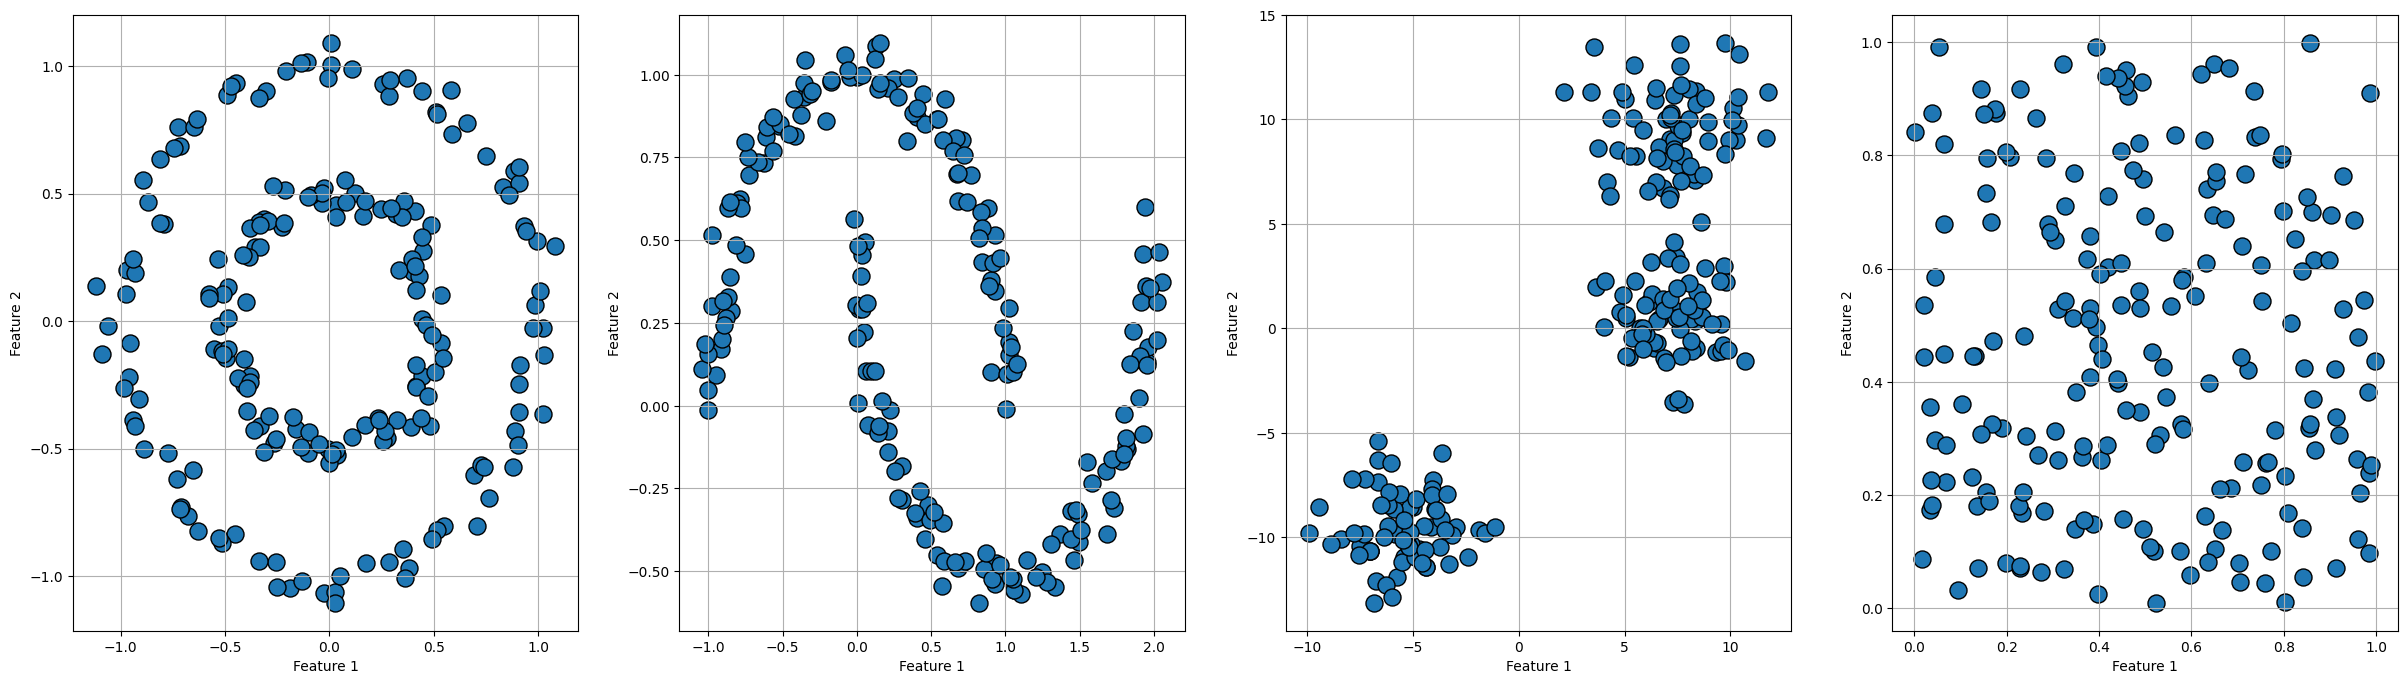

In [ ]:
n_samples = 200
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs, _ = datasets.make_blobs(n_samples=n_samples, cluster_std=1.7, random_state=8)
no_structure, _ = np.random.rand(n_samples, 2), None

dataset = [noisy_circles, noisy_moons, blobs, no_structure]
titles = ['noisy_circles', 'noisy_moons', 'blobs', 'no_structure']

fig, axes = plt.subplots(1, 4, figsize=(30, 8))

for index, data in enumerate(dataset):
  axes[index].scatter(data[:, 0], data[:, 1], marker='o',  edgecolor='black', s=150)
  axes[index].set_xlabel('Feature 1')
  axes[index].set_ylabel('Feature 2')
  axes[index].grid()
plt.show()

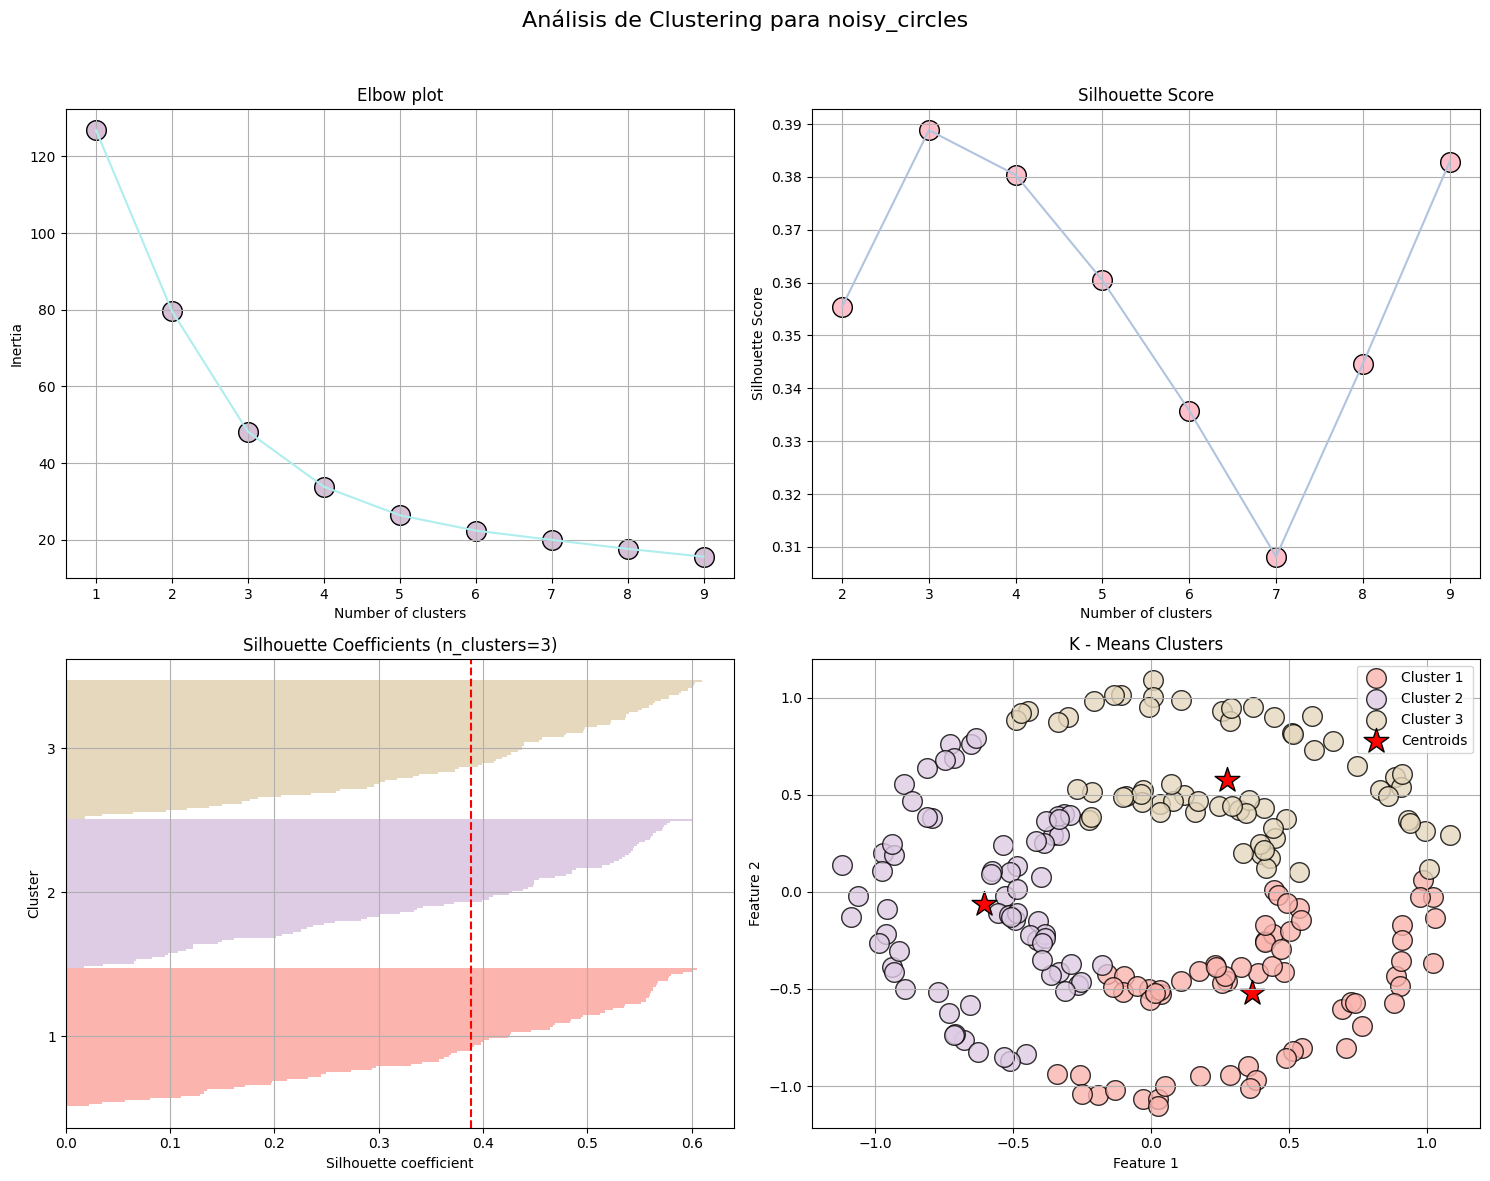

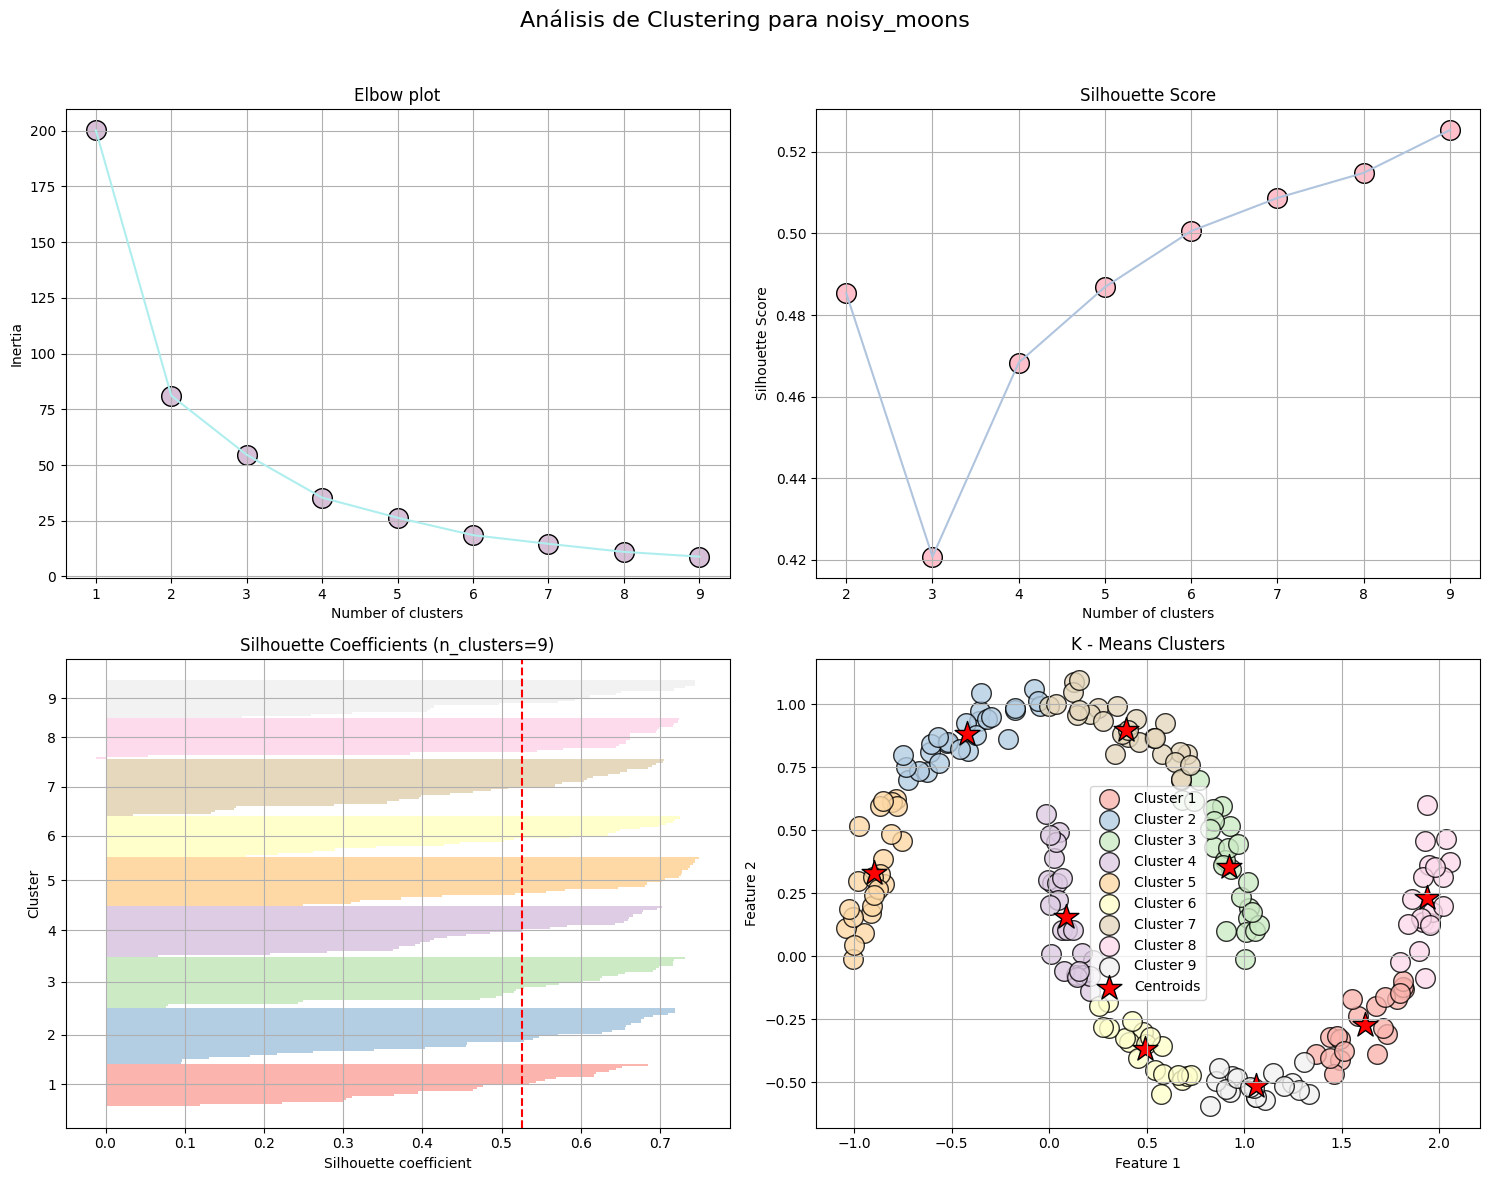

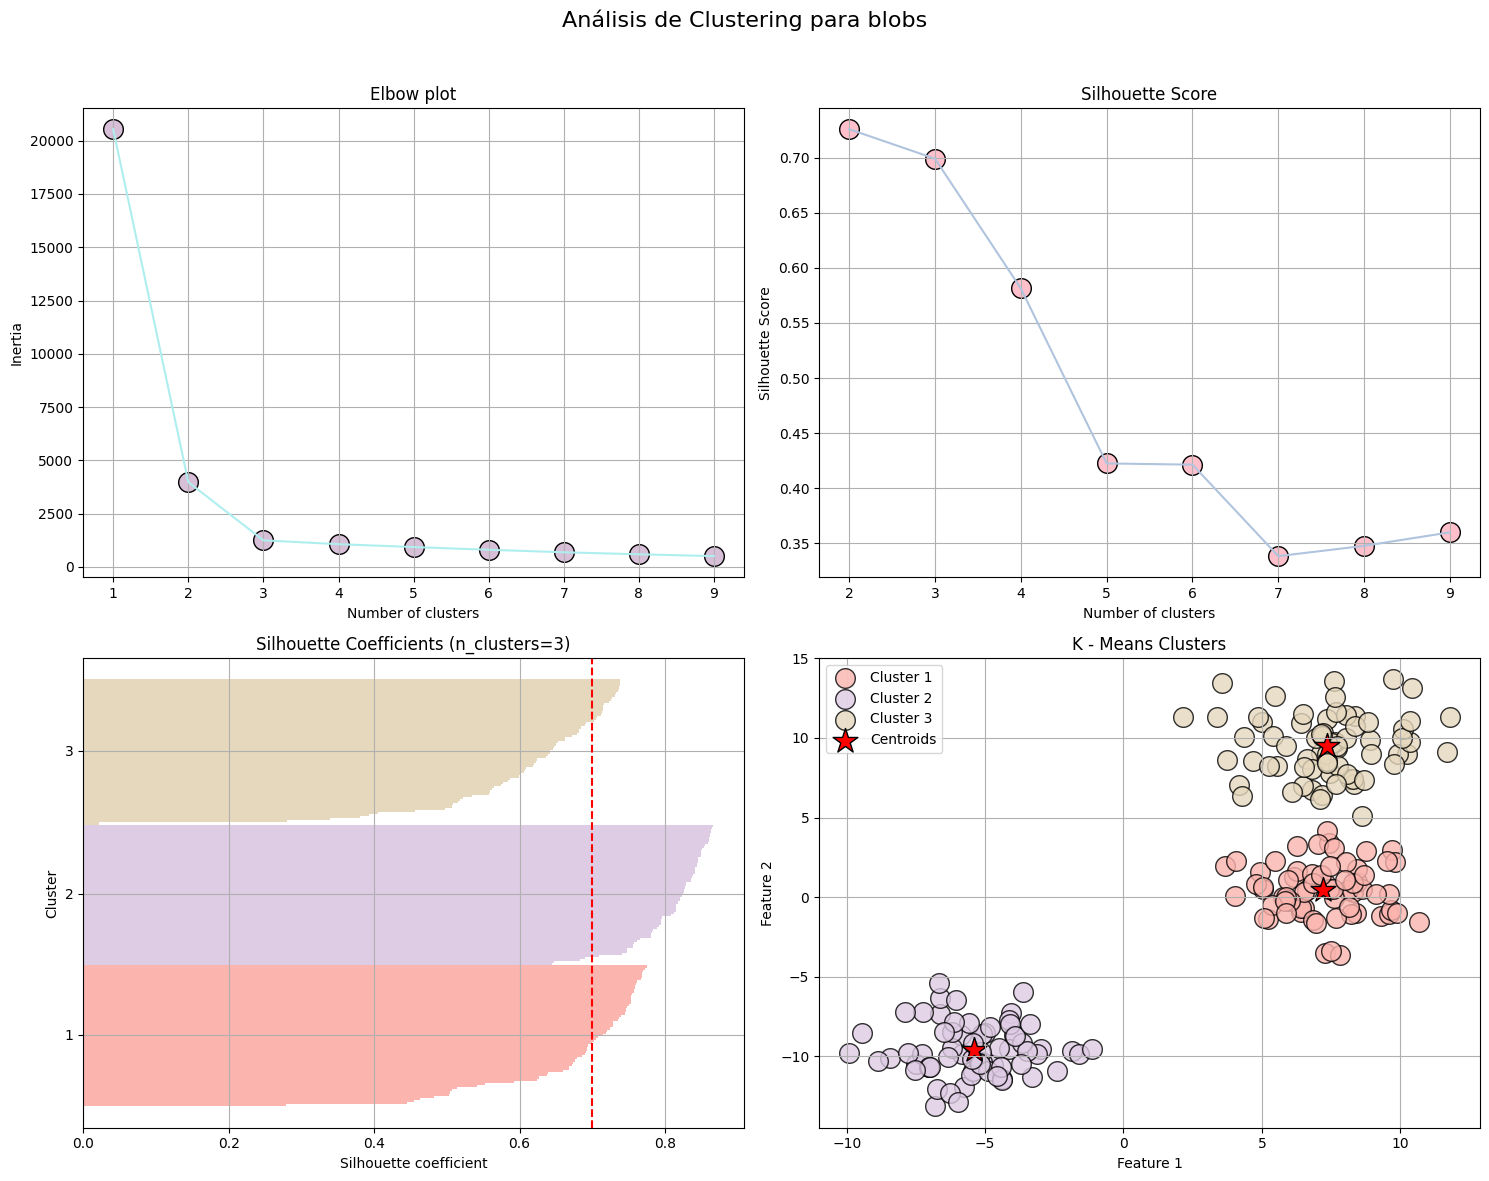

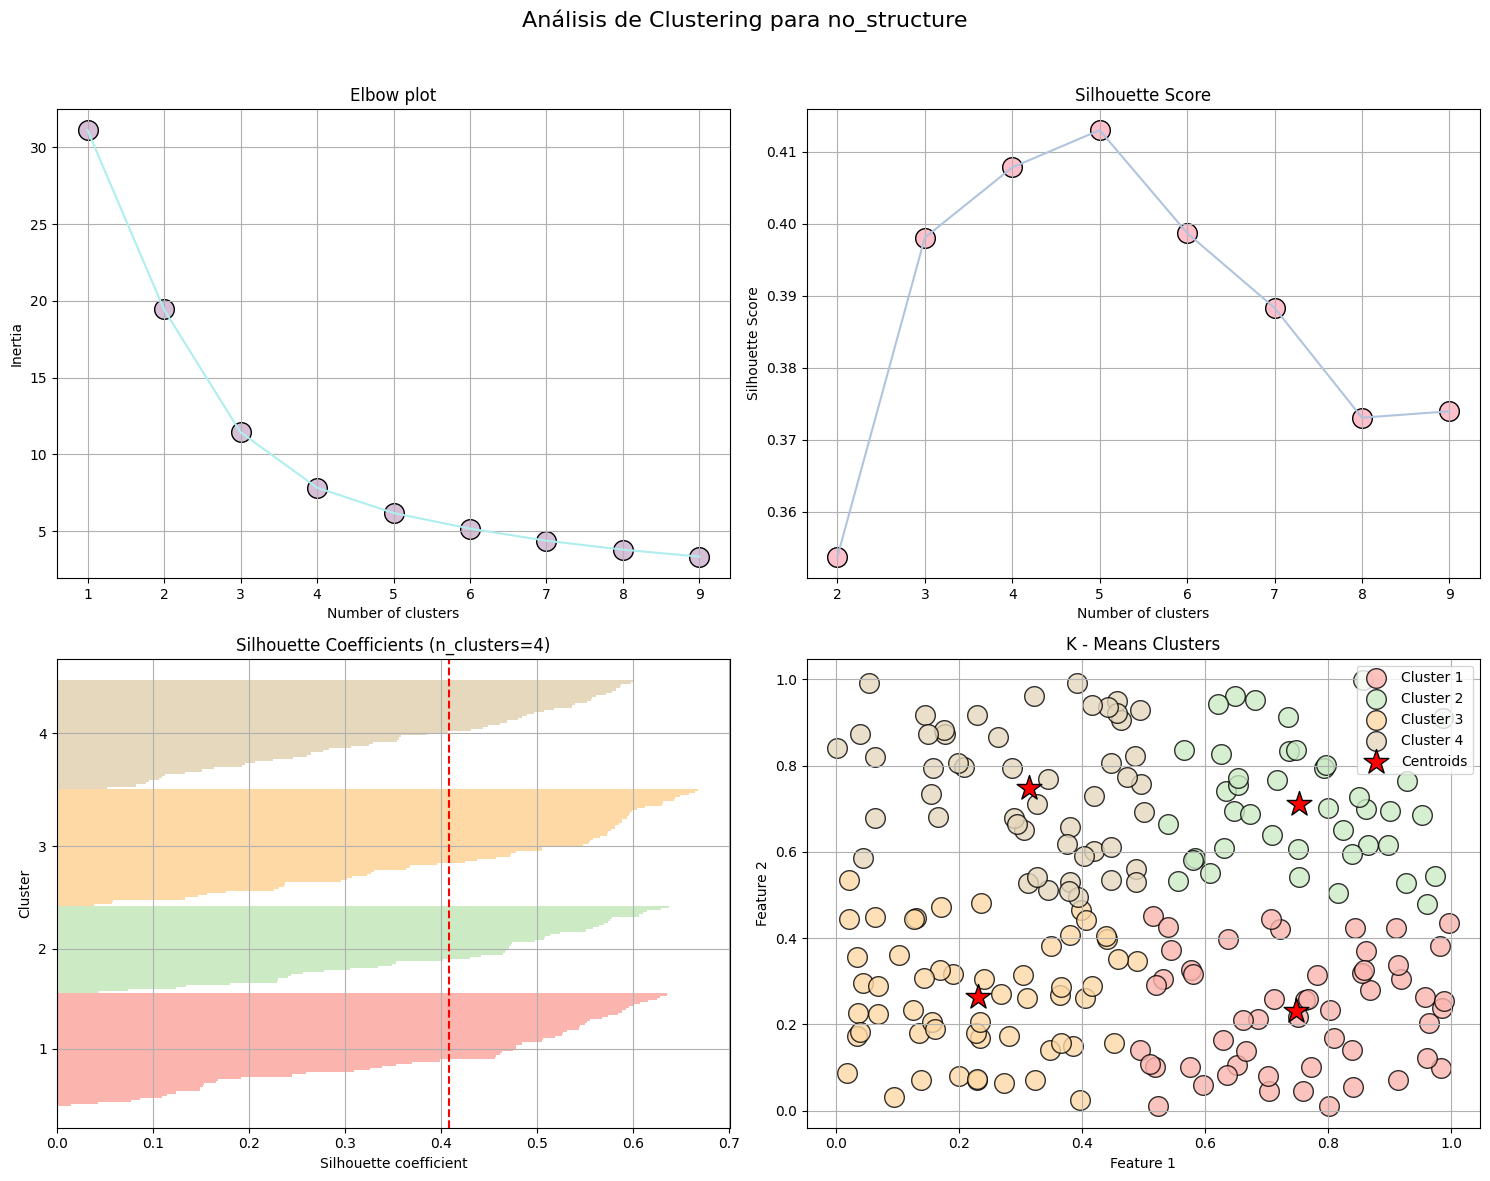

In [ ]:
def plot_elbow(ax, X, number_clusters=10):
    inertias = []
    for i in range(1, number_clusters):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(X)
        inertias.append(km.inertia_)

    ax.scatter(range(1, number_clusters), inertias, marker='o', edgecolor='black', s=200, color='thistle')
    ax.plot(range(1, number_clusters), inertias, color='paleturquoise')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow plot')
    ax.grid()

def plot_silhouette_score(ax, X, number_clusters=10):
    scores = []
    for i in range(2, number_clusters):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(X)
        scores.append(silhouette_score(X, km.labels_))

    ax.scatter(range(2, number_clusters), scores, marker='o', edgecolor='black', s=200, color='pink')
    ax.plot(range(2, number_clusters), scores, color='lightsteelblue')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Score')
    ax.grid()

def plot_silhouette_coeficient(ax, X, n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)
    cluster_labels = np.unique(y_km)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.Pastel1(float(i) / n_clusters)
        ax.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.0)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    ax.axvline(silhouette_avg, color="red", linestyle="--")
    ax.set_yticks(yticks)
    ax.set_yticklabels(cluster_labels + 1)
    ax.set_ylabel('Cluster')
    ax.set_xlabel('Silhouette coefficient')
    ax.set_title(f'Silhouette Coefficients (n_clusters={n_clusters})')
    ax.grid()

def plot_clusters(ax, X, predictions, centroids):
    # Usar viridis para asignar colores a los clusters
    cmap = cm.Pastel1
    unique_clusters = np.unique(predictions)

    for index in unique_clusters:
        # Obtener el color de la paleta viridis para cada cluster
        color = cmap(index / len(unique_clusters))
        ax.scatter(X[predictions == index, 0], X[predictions == index, 1], s=200, c=[color],
                   marker='o', edgecolor='black', alpha=0.8, label=f'Cluster {index + 1}')

    # Usar un color rojo para los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], s=350, marker='*', c='red', edgecolor='black', label='Centroids')
    ax.set_title('K - Means Clusters')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid()
    ax.legend()


# Bucle para procesar cada conjunto de datos y generar las gráficas
n_clusters_list = [3, 9, 3, 4]

# Asegúrate de definir 'dataset' y 'titles' previamente para que este código funcione correctamente
for idx, (X, n_clusters, title) in enumerate(zip(dataset, n_clusters_list, titles)):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Análisis de Clustering para {title}', fontsize=16)

    # Graficar el método del codo
    plot_elbow(axs[0, 0], X)

    # Graficar el puntaje de silueta
    plot_silhouette_score(axs[0, 1], X)

    # Graficar el coeficiente de silueta para cada punto en el cluster
    plot_silhouette_coeficient(axs[1, 0], X, n_clusters=n_clusters)

    # Predicción y visualización de clusters
    km = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, tol=1e-04, random_state=0)
    predictions = km.fit_predict(X)

    # Graficar los clusters y los centroides
    plot_clusters(axs[1, 1], X, predictions, km.cluster_centers_)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


##**Parte 2**

Se utiliza el algoritmo de k-means para intentar agrupar las imágenes por
individuos. Se experimenta con diferentes número de grupos y se visualizan los valores de las clases así como los centroides. ¿Qué se puede concluir a partir de los resultados?. La información completa de conjunto de datos disponible en [fetch_olivetti_faces](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_faces = fetch_olivetti_faces()
olivetti_faces.images.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 64, 64)

(64, 64) 0.7231405


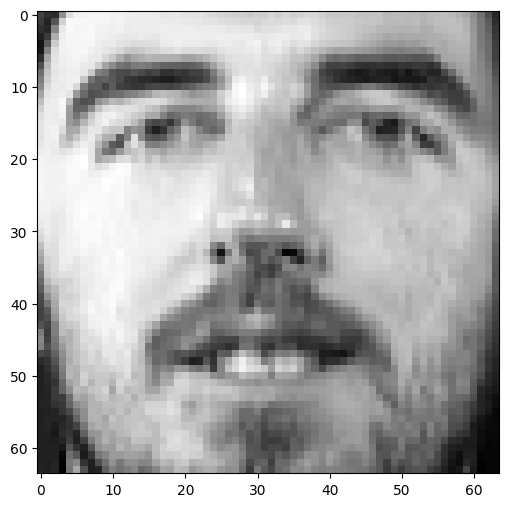

In [ ]:
image = olivetti_faces.images[100]
print(image.shape, image[0, 31])
plt.figure(figsize=(6,6))
plt.imshow(image, 'gray')

In [ ]:
print(image)

[[0.2892562  0.23966943 0.22727273 ... 0.43801653 0.33471075 0.2107438 ]
 [0.2768595  0.20247933 0.35123968 ... 0.45454547 0.37190083 0.23140496]
 [0.23966943 0.2107438  0.5        ... 0.46280992 0.39256197 0.2520661 ]
 ...
 [0.19008264 0.19421488 0.19008264 ... 0.10743801 0.11157025 0.11157025]
 [0.19421488 0.18595041 0.1983471  ... 0.09917355 0.10743801 0.11157025]
 [0.1983471  0.18595041 0.20661157 ... 0.09504132 0.10743801 0.11157025]]


In [ ]:
image.flatten().shape

(4096,)

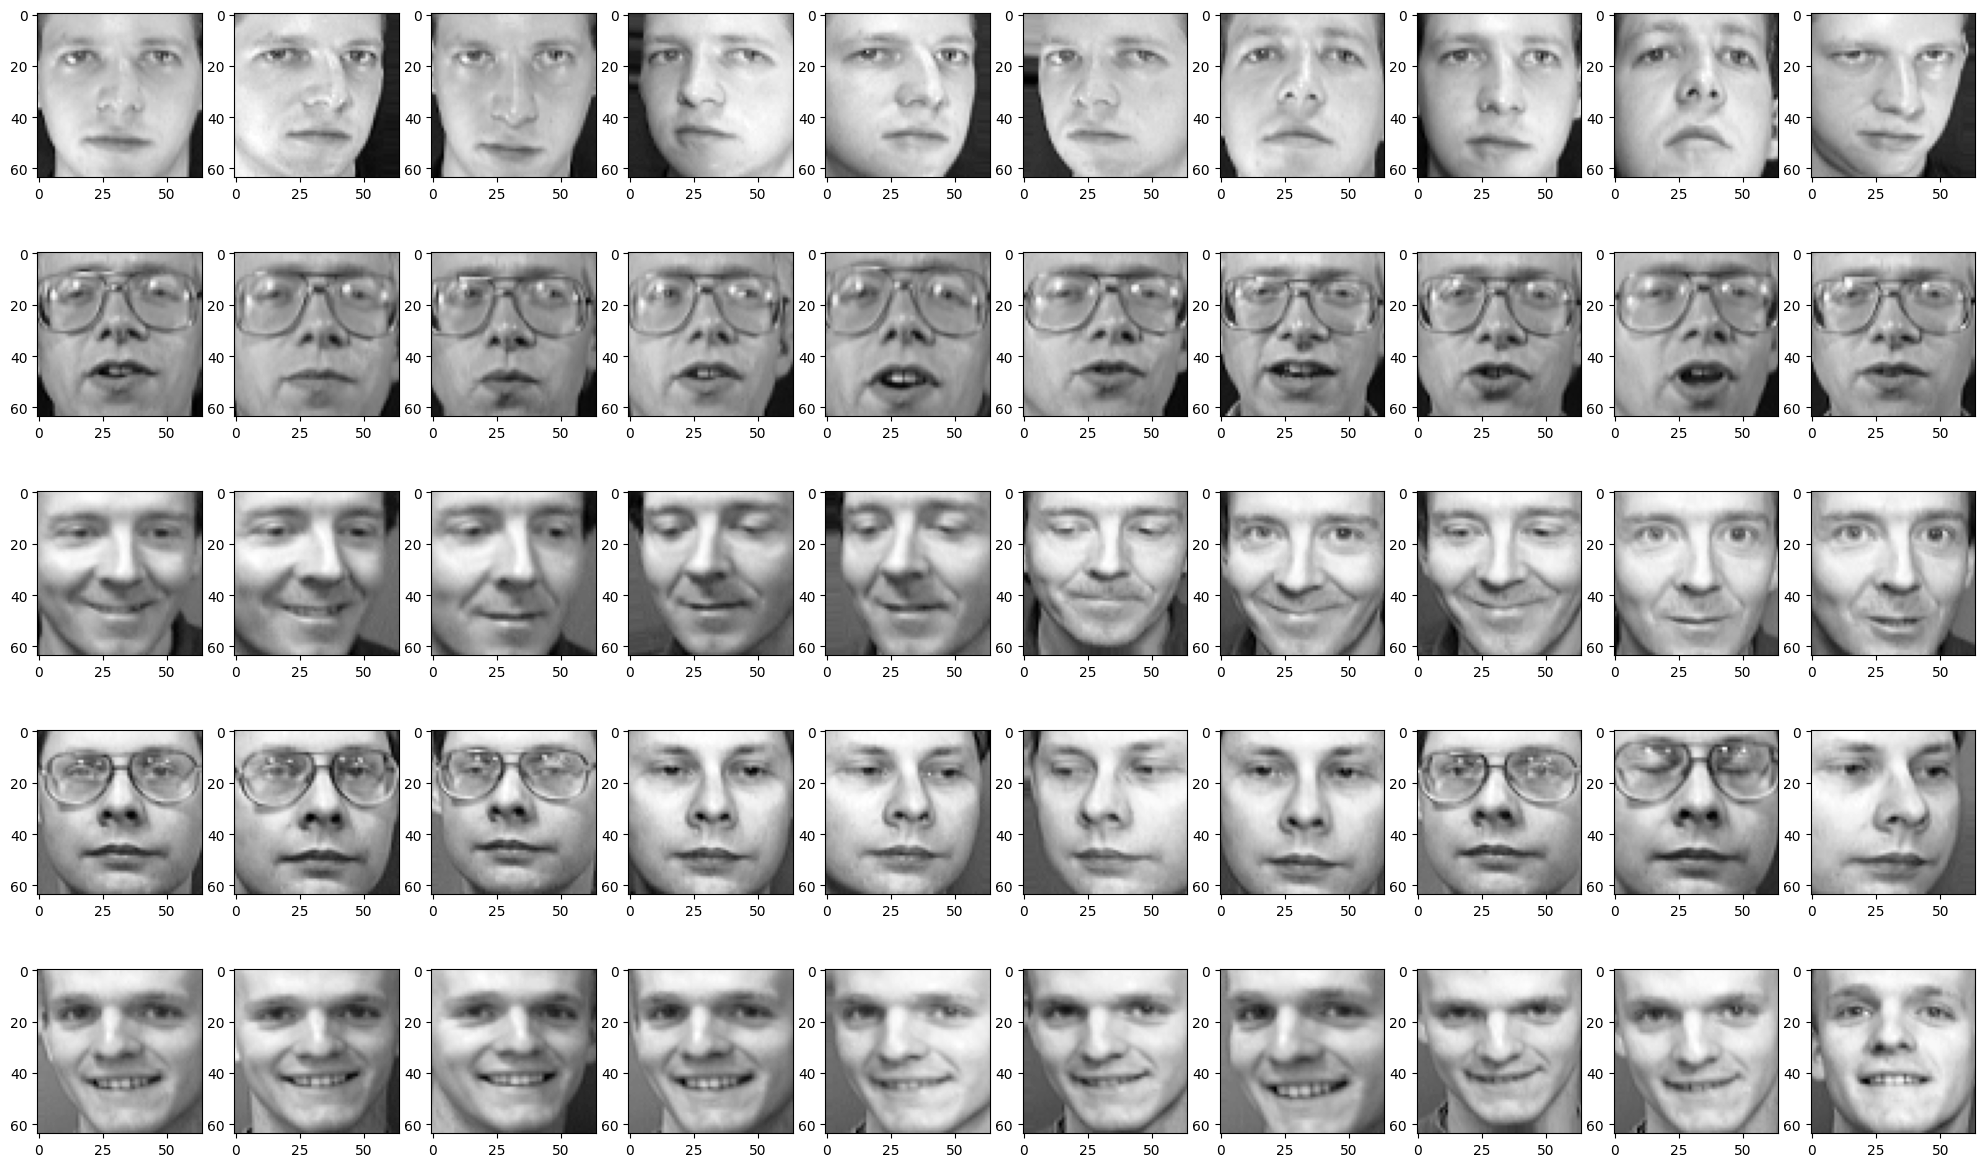

In [ ]:
rows = 5
columns = 10
fig, axes = plt.subplots(rows, columns, figsize=(25, 15))
index = 0
for i in range(rows):
  for j in range(columns):
    axes[i][j].imshow(olivetti_faces.images[index], 'gray')
    index += 1

In [ ]:
faces = pd.DataFrame(olivetti_faces.data)
faces['target'] = olivetti_faces.target
faces.head(20)

0         1         2         3         4         5         6  \
0   0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1   0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2   0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3   0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4   0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
5   0.549587  0.545455  0.541322  0.537190  0.537190  0.533058  0.528926   
6   0.330579  0.305785  0.330579  0.351240  0.425620  0.500000  0.603306   
7   0.128099  0.185950  0.247934  0.314050  0.388430  0.462810  0.520661   
8   0.243802  0.297521  0.367769  0.454545  0.495868  0.537190  0.578512   
9   0.380165  0.442149  0.483471  0.545455  0.582645  0.628099  0.648760   
10  0.541322  0.586777  0.640496  0.661157  0.685950  0.685950  0.690083   
11  0.644628  0.690083  0.702479  0.702479  0.706612  0.719008  0.727273   
12  0.657025  0.677686  0.698347  0.706612  0.702479  0.710744  0.702479   
13  0.628099  0.644628  0.673554  0.698347  0.698347  0.698347  0.677686   
14  0.636364  0.652893  0.669421  0.677686  0.685950  0.702479  0.698347   
15  0.669421  0.681818  0.706612  0.714876  0.719008  0.727273  0.727273   
16  0.628099  0.603306  0.628099  0.723140  0.702479  0.694215  0.698347   
17  0.586777  0.595041  0.681818  0.694215  0.714876  0.698347  0.714876   
18  0.681818  0.706612  0.719008  0.710744  0.714876  0.727273  0.735537   
19  0.566116  0.619835  0.657025  0.690083  0.702479  0.714876  0.702479   

           7         8         9  ...      4087      4088      4089      4090  \
0   0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157  0.475207   
1   0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2   0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3   0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4   0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   
5   0.533058  0.590909  0.611570  ...  0.619835  0.623967  0.615702  0.661157   
6   0.632231  0.644628  0.644628  ...  0.541322  0.541322  0.524793  0.537190   
7   0.557851  0.590909  0.623967  ...  0.157025  0.165289  0.148760  0.157025   
8   0.603306  0.611570  0.632231  ...  0.669421  0.537190  0.235537  0.169421   
9   0.677686  0.690083  0.710744  ...  0.157025  0.165289  0.148760  0.165289   
10  0.698347  0.694215  0.690083  ...  0.483471  0.495868  0.512397  0.528926   
11  0.739669  0.719008  0.719008  ...  0.495868  0.297521  0.074380  0.099174   
12  0.681818  0.681818  0.714876  ...  0.483471  0.280992  0.082645  0.115702   
13  0.690083  0.652893  0.640496  ...  0.119835  0.107438  0.115702  0.103306   
14  0.702479  0.714876  0.710744  ...  0.504132  0.487603  0.479339  0.347107   
15  0.735537  0.727273  0.719008  ...  0.074380  0.115702  0.115702  0.111570   
16  0.714876  0.735537  0.743802  ...  0.413223  0.144628  0.173554  0.322314   
17  0.727273  0.743802  0.739669  ...  0.380165  0.400826  0.330579  0.148760   
18  0.739669  0.735537  0.727273  ...  0.103306  0.111570  0.115702  0.111570   
19  0.702479  0.723140  0.681818  ...  0.483471  0.500000  0.483471  0.177686   

        4091      4092      4093      4094      4095  target  
0   0.132231  0.148760  0.152893  0.161157  0.157025       0  
1   0.152893  0.152893  0.152893  0.152893  0.152893       0  
2   0.148760  0.144628  0.140496  0.148760  0.152893       0  
3   0.743802  0.764463  0.752066  0.752066  0.739669       0  
4   0.177686  0.177686  0.177686  0.173554  0.173554       0  
5   0.661157  0.690083  0.714876  0.706612  0.702479       0  
6   0.487603  0.190083  0.144628  0.152893  0.152893       0  
7   0.157025  0.152893  0.152893  0.173554  0.173554       0  
8   0.177686  0.190083  0.190083  0.181818  0.190083       0  
9   0.173554  0.173554  0.173554  0.173554  0.173554       0  
10  0.363636  0.111

In [ ]:
faces['target'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

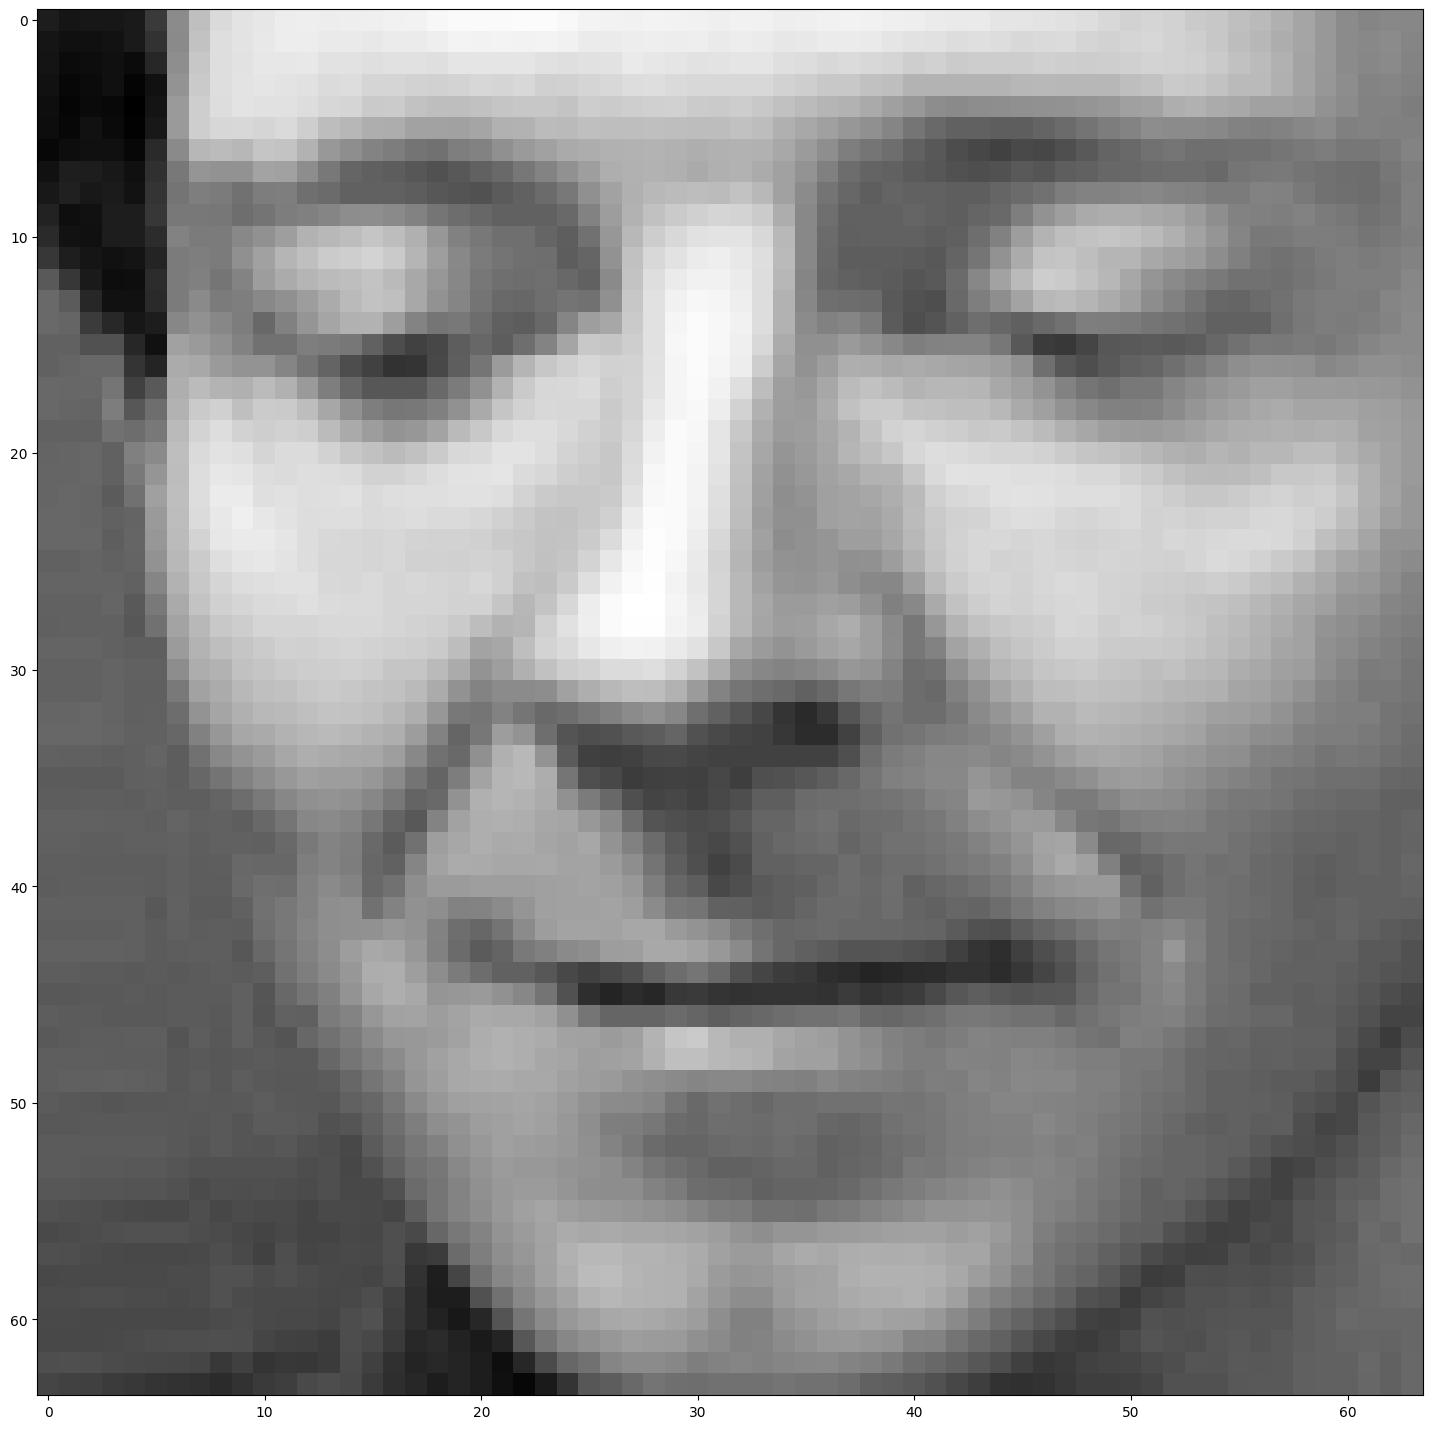

In [ ]:
plt.figure(figsize=(18,18))
image2 = olivetti_faces.data[23].reshape(64, 64)
plt.imshow(image2, 'gray')

In [ ]:
faces.drop('target', axis=1, inplace=True)

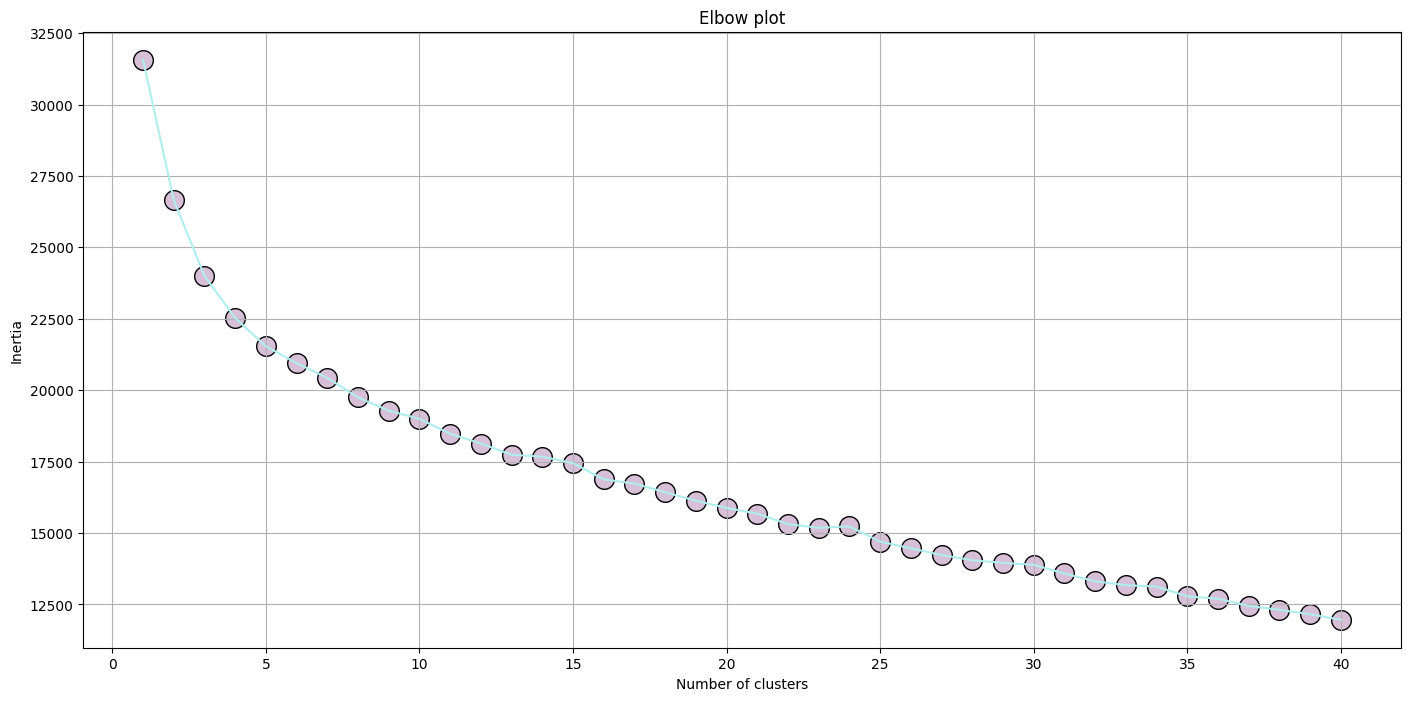

In [ ]:
def plot_elbow(X, number_clusters=41):
    inertias = []
    for i in range(1, number_clusters):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(X)
        inertias.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(17, 8))
    ax.scatter(range(1, number_clusters), inertias, marker='o', edgecolor='black', s=200, color='thistle')
    ax.plot(range(1, number_clusters), inertias, color='paleturquoise')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow plot')
    ax.grid()
    return ax

X = faces
plot_elbow(X)
plt.show()

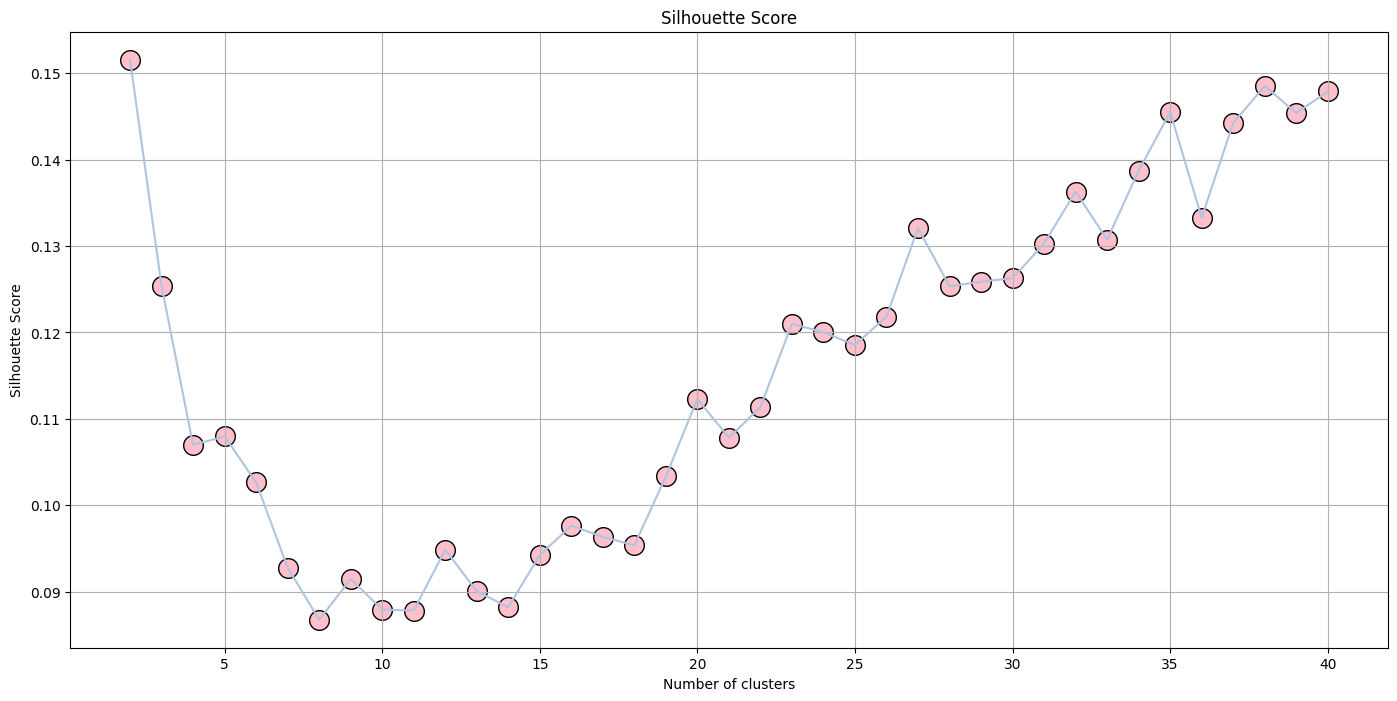

In [ ]:
def plot_silhouette_score(X, number_clusters=41):
    scores = []
    for i in range(2, number_clusters):
        km = KMeans(n_clusters=i, init='k-means++', n_init=11, max_iter=300, random_state=0)
        km.fit(X)
        scores.append(silhouette_score(X, km.labels_))

    fig, ax = plt.subplots(figsize=(17, 8))
    ax.scatter(range(2, number_clusters), scores, marker='o', edgecolor='black', s=200, color='pink')
    ax.plot(range(2, number_clusters), scores, color='lightsteelblue')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Score')
    ax.grid()
    return ax
plot_silhouette_score(X)
plt.show()

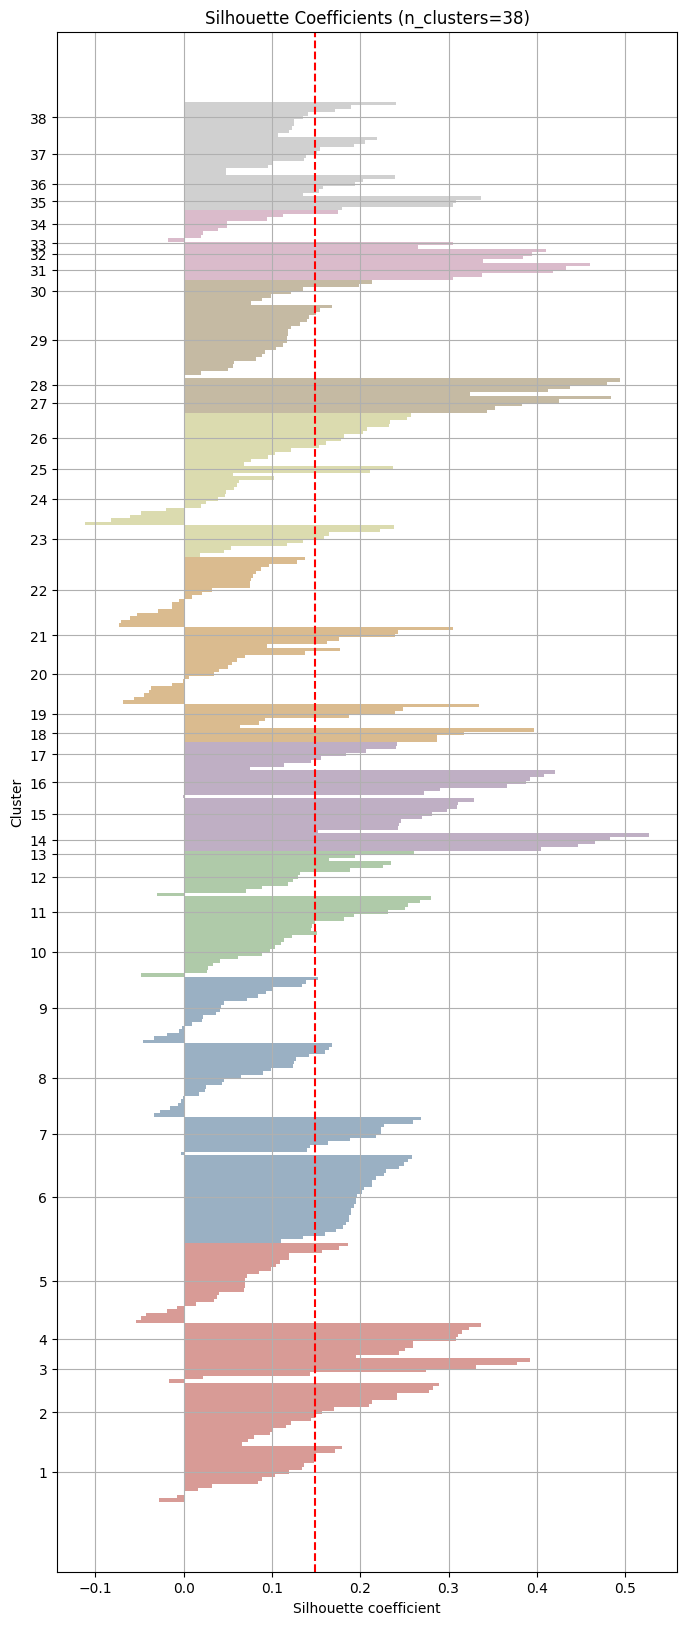

In [ ]:
def plot_silhouette_coeficient(X, n_clusters=38):
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)

    cluster_labels = np.unique(y_km)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    # Ajustar el tamaño de la figura
    plt.figure(figsize=(8, 20))

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)

        # Ajustar el color para que sea más oscuro
        color = cm.Pastel1(float(i) / n_clusters)
        color_darker = (color[0] * 0.86, color[1] * 0.86, color[2] * 0.86)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color_darker)

        yticks.append((y_ax_lower + y_ax_upper) / 2.0)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title(f'Silhouette Coefficients (n_clusters={n_clusters})')
    plt.grid()
    plt.show()

plot_silhouette_coeficient(X)

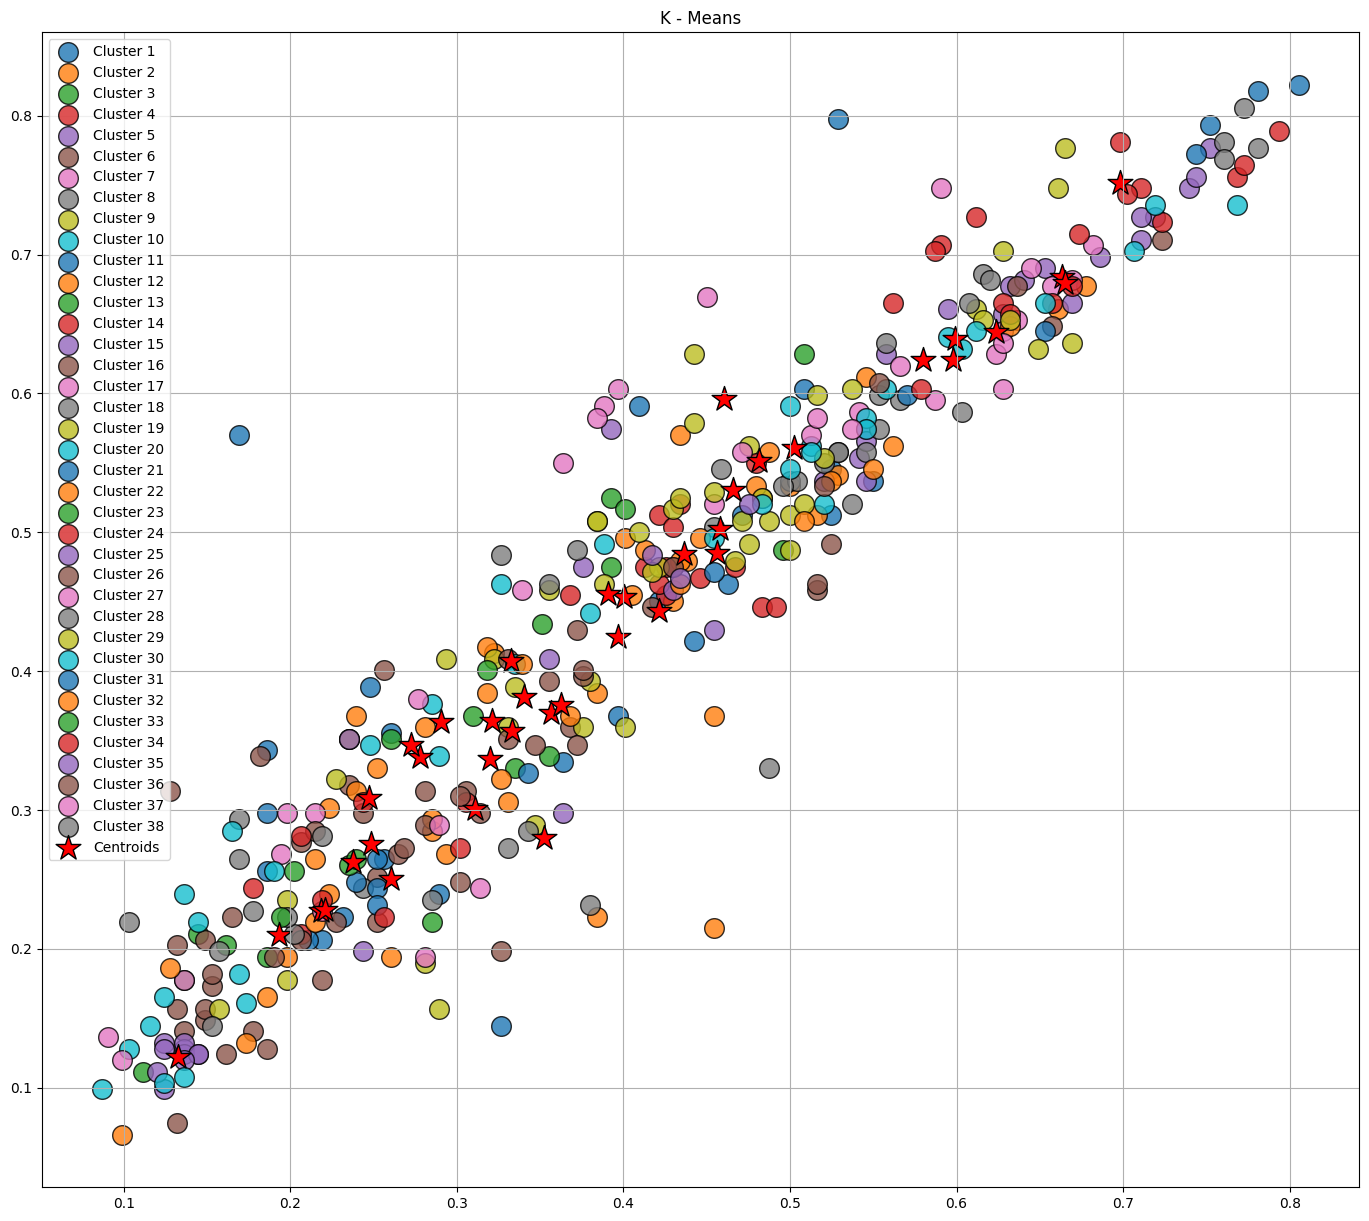

In [ ]:
# Inicialización de KMeans
km = KMeans(n_clusters=38, n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
centroids = km.cluster_centers_

X = np.array(X)

# Función para graficar clusters
def plot_clusters(X, predictions, centroids):
    colors = list(mcolors.TABLEAU_COLORS.keys())
    fig, ax = plt.subplots(figsize=(17, 15))

    for index in range(len(centroids)):
        # Utiliza el índice módulo la longitud de la lista de colores para reutilizarlos
        color = colors[index % len(colors)]
        ax.scatter(X[predictions == index, 0],
                   X[predictions == index, 1],
                   s=200,
                   c=color,
                   marker='o',
                   edgecolor='black',
                   alpha=0.8,
                   label=f'Cluster {index + 1}'
                  )

    # Grafica los centroides
    ax.scatter(centroids[:, 0],
               centroids[:, 1],
               s=350, marker='*',
               c='red', edgecolor='black',
               label='Centroids')
    ax.set_title('K - Means')
    ax.grid()
    ax.legend()
    return ax

# Llama a la función para graficar los clusters
plot_clusters(X, y_km, centroids)
plt.show()


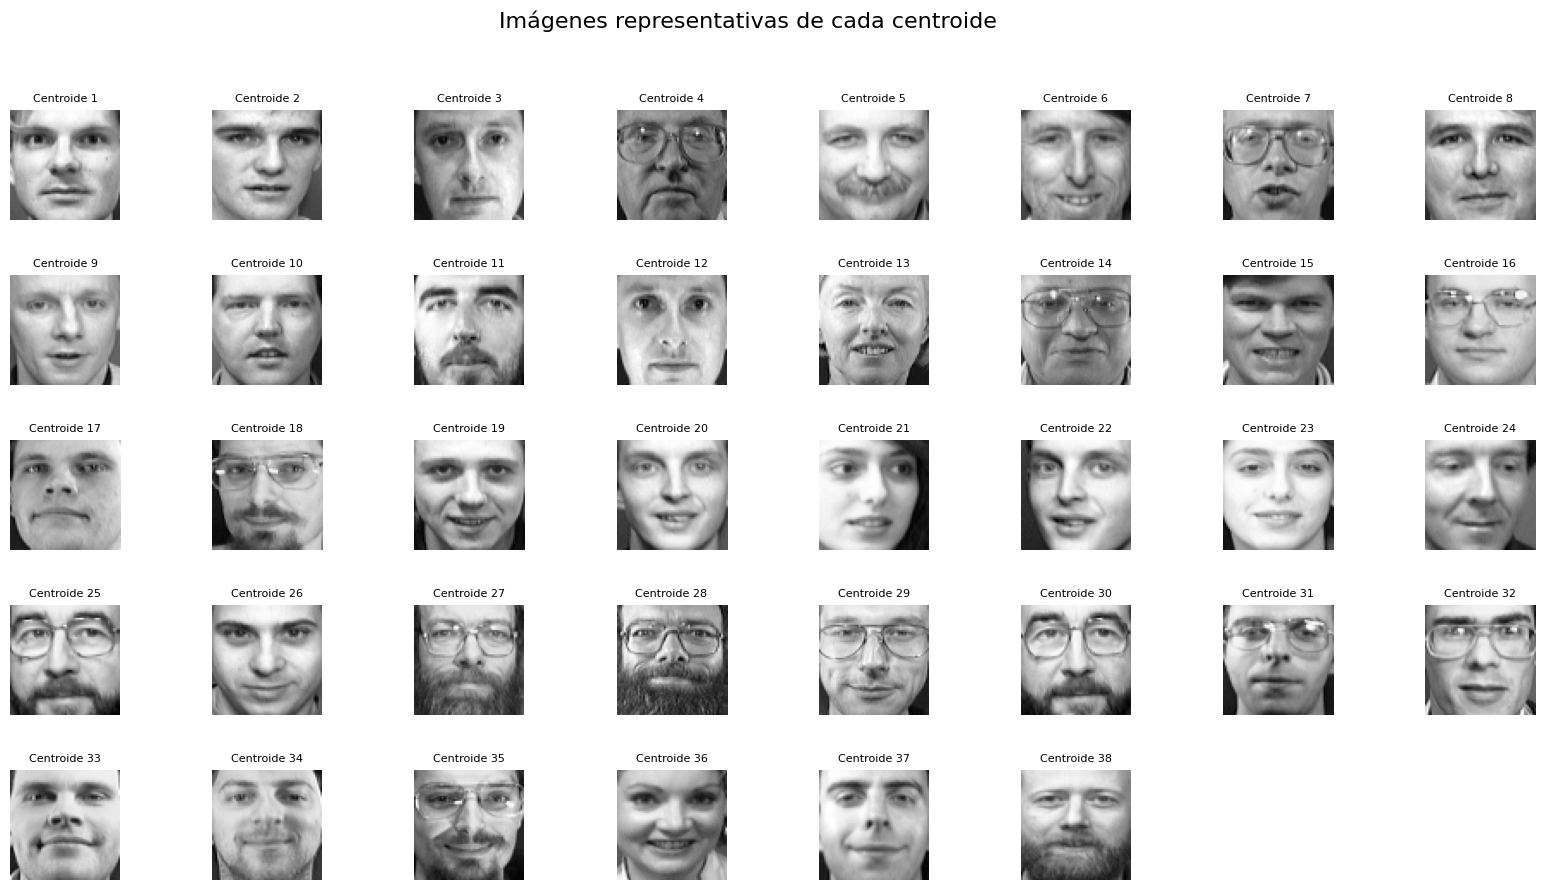

In [ ]:
X = np.array(X)

# Configura el modelo KMeans y ajusta a los datos
n_clusters = 38
km = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

# Encuentra el punto más cercano a cada centroide en X
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)

rows = 5
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

# Muestra cada imagen representativa de los centroides
for idx, close_idx in enumerate(closest):
    image = X[close_idx].reshape(64, 64)
    axes[idx].imshow(image, cmap='gray')
    axes[idx].set_title(f'Centroide {idx + 1}', fontsize=8)
    axes[idx].axis('off')

for i in range(len(closest), len(axes)):
    axes[i].axis('off')

plt.suptitle('Imágenes representativas de cada centroide', fontsize=16)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


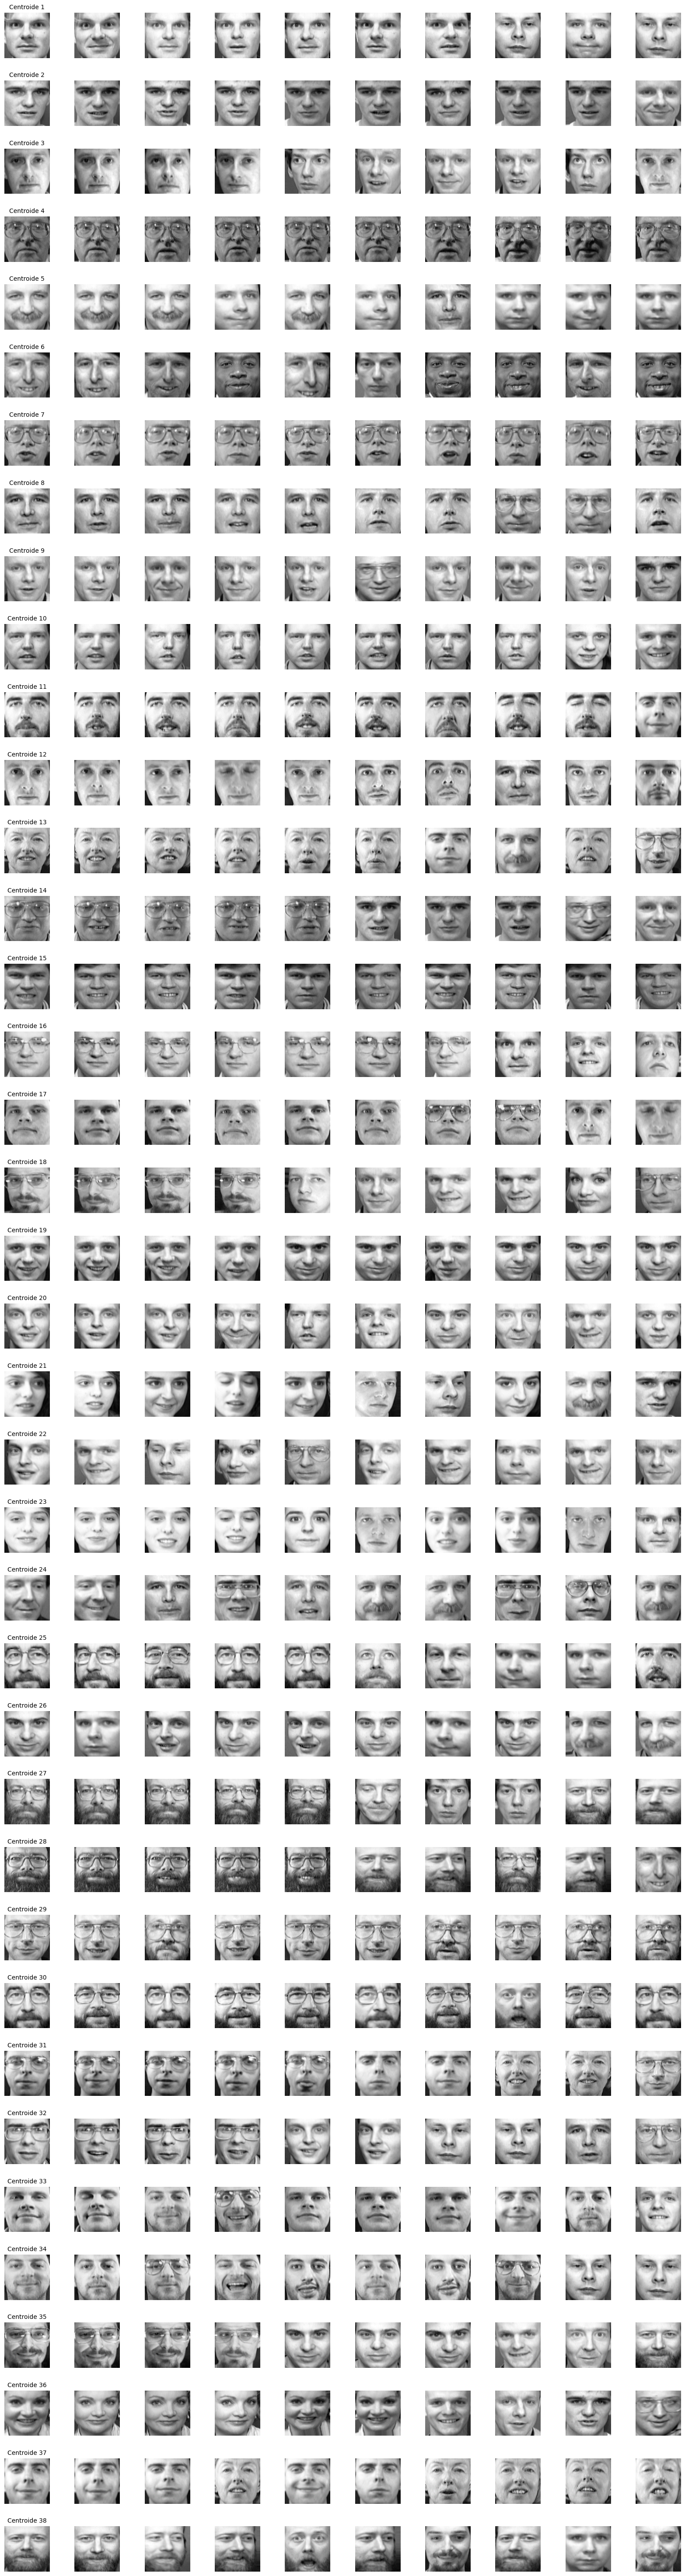

# Conclusiones

**Parte 1**

En este punto se nos presentan 4 diferentes distribuciones de datos de las cuales la distribucion blobs es la que presenta una diferencia entre grupos mas notable, aun asi se procede con la realización de los graficos de codo y silueta para cada uno de las distribuciones teniendo como resultados:



*   Para la distribución noisy_circles podemos evidenciar gracias al grafico de codo que se presentan diferencias significadtivas entre los parametros 2 y 3 del k-means siendo seleccionado al final el parametro 3 con la ayuda de la grafica de silueta en la cual primero se evidencia que tiene el score mas cercano a 1 y esta presenta los grupos en un tamaño mas uniformes
*   Para la distribución noisy_moons se selecciono el parametro de k-means 9, esto debido que a pesar de no presentar una gran diferencia en la grafica de codo si se presentan una gran uniformidad de los grupos en la grafica de silueta siendo este uno de los principales factores a tener en cuenta al momento de seleccionar esta desición
*   Para la distribución blobs, desde un inicio se tenia claro visualmente que la cantidad de grupos era 3 aun asi se puede corroborar con las graficas en las cuales apoyados con los resultados de las graficas de codo y silueta podemos evidenciar que el valor de 3 para el parametro de k-means brinda un buen resultado. Es decir, que con base a un analisis visual se evidencian que el numero optimo de grupos es 3 debido a la distribución de los datos (A pesar que las graficas tambien indicaban que el numero 2 de parametros de k-means presentaban 2 resultados se decidio utilizar 3 debido al planteamiento inicial y la poca diferencia que respecta con el parametro anteriormente mencionado) y se corrobora con los datos de las graficas
*   Para la distribución no_structure, se evidencia gracias al grafico de silueta que la cantidad de 4 en el parametro de k-means es el que mejor se adapta a los datos, de igual manera se puede evidenciar en el grafico de codo que en esta cantidad se presenta una diferencia significativa


**Parte 2**

En este punto se nos implica crear un algoritmo de k-means que se capaz de clasificar caras con respecto a su razgos unicos. Inicialmente tenemos un grupo de 40 caras diferentes y al momento de hacer la transformaciones necesarias y el analisis necesario para evaluar la cantidad de grupos a tener en cuenta tenemos como resultado que el numero 38 de grupos es el que mejor nos brinda resultados a presentar en la grafica de silueta el resultado mas cercano a 1 (Obviando los primeros grupos que a pesar de presentar un buen valor se omiten debido a la informacion que ya se obtiene del dataset), por otra parte el grafico de codo a pesar de presentar una variacion poco significativa entre sus vecinos del valor 38 se decide tomar el mismo influenciado con base al valor de la grafica anteriormente mencionada. Por ultimo vale aclarar que se grafico los datos para ver la distribuciòn de los mismos y sus respectivos centroides, aun asi debido a la cantidad de caracteristicas de los datos no es posible evidenciar con claridad lo anteriormente mencionado.


